In [1]:
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import math

In [2]:
dip = cv2.VideoCapture('C:\\LastbackUp\\디지털영상처리\\assignment1\\out.avi',0)

w = round(dip.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(dip.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = dip.get(cv2.CAP_PROP_FPS)

print("width = %d, height = %d, fps = %d" %(w, h, fps))

width = 720, height = 404, fps = 30


In [3]:
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('C:\\LastbackUp\\디지털영상처리\\assignment1\\filtered.avi', fourcc, 30.0, (w, h))

In [4]:
# border 의 기본값이 미러패딩이기 때문에, 따로 지정하지는 않는다
class Filtering :
    # 이동평균 필터
    def avg(self, k, img) : 
        f = f / (k*k)
        result = cv2.filter2D(img, -1, f)
        return result
    # 중간값 필터
    def med(self, k, img) :
        return cv2.medianBlur(img, k)
    # 라플라시안 필터
    def lap(self, k, img) :
        if k == 3 :
            f = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        elif k == 5:
            f = np.array([[4, 1, 0, 1, 4],
                          [1, -2, -3, -2, 1],
                          [0, -3, -4, -3, 0],
                          [1, -2, -3, -2, 1],
                          [4, 1, 0, 1, 4]])
        elif k == 8:
            f = np.array([[10, 5, 2, 1, 2, 5, 10],
                          [5, 0, -3, -4, -3, 0, 5],
                          [2, -3, -6, -7, -6, -3, 2],
                          [1, -4, -7, -8, -7, -4, 1],
                          [2, -3, -6, -7, -6, -3, 2],
                          [5, 0, -3, -4, -3, 0, 5],
                          [10, 5, 2, 1, 2, 5, 10]])
        else :
            print("허용 범위를 넘은 필터 사이즈입니다. 다시 시도해 주세요.")
            f = np.zeros((k, k), np.float32)
        result = cv2.filter2D(img, -1, f)
        return result
    # sobel 필터
    def sob(self, k, img) :
        fx = cv2.getDerivKernels(1, 0, k)
        fy = cv2.getDerivKernels(0, 1, k)
        hor = cv2.filter2D(img, -1, np.outer(fx[0], fx[1]))
        ver = cv2.filter2D(img, -1, np.outer(fy[0], fx[1]))
        return hor + ver
    #Gaussian 필터 적용
    def gas(self, k, img) :
        s1 = 1 / (2 * math.pi)
        f = np.zeros((k, k))
        K = int((k-1)/2)
        for i in range(-K, K+1) :
            for j in range(-K, K+1) :
                s2 = (i**2 + j**2) / 2
                s3 = math.exp(-s2)
                f[i+K, j+K] = s1 * s3
        result = cv2.filter2D(img, -1, f)
        return result

In [5]:
class Histogram :
    three = ('b', 'g', 'r')
    # 각 밴드의 히스토그램
    def hist1_(self, t) :
        plt.subplot(1, 3, 1)
        for i, rgb in enumerate(self.three) :
            hist1 = cv2.calcHist([t], [i], None, [256], [0, 256])
            plt.plot(hist1, color = rgb)
        plt.title('RGB Histogram')
    #누적 히스토그램을 위한 리스트 누적 함수
    def sumlist(self, lst) :
        new = []
        new.append(lst[0])
        for i in range(1, 256) :
            new.append(lst[i] + new[i-1])
        return new
    # 각 밴드의 누적 히스토그램
    def hist2_(self, t):
        plt.subplot(1, 3, 2)
        for i, rgb in enumerate(self.three):
            hist2 = cv2.calcHist([t], [i], None, [256], [0, 256])
            hist3 = np.concatenate(hist2, axis = None)
            plt.plot(self.sumlist(hist3), color = rgb)
        plt.title('RGB Cumulative Histogram')
    # 흑백 히스토그램
    def hist3_(self, t) :
        gray = cv2.cvtColor(t, cv2.COLOR_BGR2GRAY)
        plt.subplot(1, 3, 3)
        hist4 = cv2.calcHist([gray], [0], None, [256], [0, 256])
        plt.plot(hist4, color = 'gray')
        plt.title('Grayscale Histogram')

In [7]:
print("=========================================================================================")
print("이동평균 필터 : 1, 중간값 필터 : 2, Laplacian 필터 : 3, Sobel 필터 : 4, Gaussian 필터 : 5")
print("=========================================================================================")
n = int(input("필터 종류 : "))
k = int(input("필터 크기 : "))

이동평균 필터 : 1, 중간값 필터 : 2, Laplacian 필터 : 3, Sobel 필터 : 4, Gaussian 필터 : 5


필터 종류 :  3
필터 크기 :  3


In [8]:
flt = Filtering()

while(dip.isOpened()) :
    ret, frame = dip.read()
    if ret :
        if n == 1:
            result = flt.avg(k, frame)
        elif n == 2:
            result = flt.med(k, frame)
        elif n == 3:
            result = flt.lap(k, frame)
        elif n == 4:
            result = flt.sob(k, frame)
        elif n == 5:
            result = flt.gas(k, frame)
            
        out.write(result)
        if 0xFF == ord('q'):
            break
    else:
        break
dip.release()
cv2.destroyAllWindows()

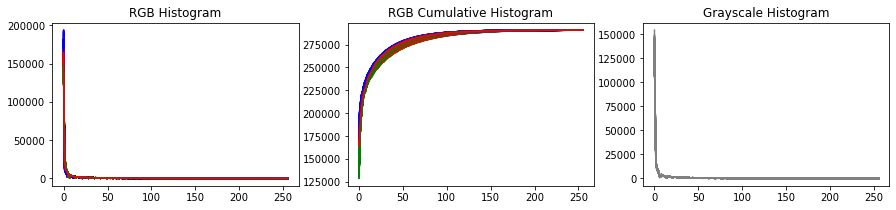

In [9]:
hst = Histogram()
fltdip = cv2.VideoCapture('C:\\LastbackUp\\디지털영상처리\\assignment1\\filtered.avi', 0)
plt.figure(figsize = (15, 3))

while(fltdip.isOpened()):
    ret, frame = fltdip.read()
    if ret:
        cv2.imshow('filtered_image', frame)
        hst.hist1_(frame)
        hst.hist2_(frame)
        hst.hist3_(frame)
        
        if cv2.waitKey(20) & 0xFF == ord('q') :
            break
    else:
        break
plt.show()
fltdip.release()
cv2.destroyAllWindows()